<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 20, 2018: cleanup, `sin` and `cos` $g$ polys
<br>November 16 and 18, 2016: classic $g$ polys
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Stirling array $\mathcal{S}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha

from commons import *
from matrix_functions import *
from sequences import *
import functions_catalog

init_printing()

# Stirling array $\mathcal{S}$

In [2]:
from sympy.functions.combinatorial.numbers import stirling

In [3]:
m=8

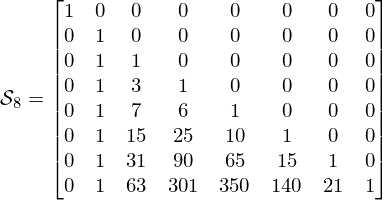

In [4]:
S2 = define(let=Symbol(r'\mathcal{{S}}_{{ {} }}'.format(m)), 
            be=Matrix(m, m, lambda n,k: stirling(n,k, kind=2)))
S2 # this version is the pure one

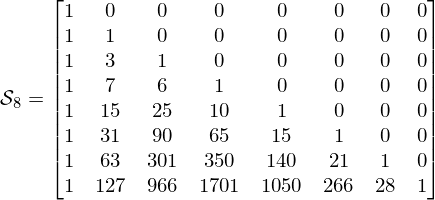

In [5]:
S2 = define(let=Symbol(r'\mathcal{{S}}_{{ {} }}'.format(m)), 
            be=Matrix(m, m, riordan_matrix_exponential(
                riordan_matrix_by_convolution(d=Eq(Function('d')(z), exp(z)),
                                              h=Eq(Function('h')(z), exp(z)-1),
                                              dim=m))))
S2

In [6]:
inspect(S2.rhs)

nature(is_ordinary=False, is_exponential=True)

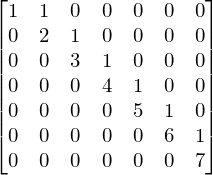

In [7]:
production_matrix(S2.rhs)

In [8]:
eigendata = spectrum(S2)
eigendata

In [9]:
data, eigenvals, multiplicities = eigendata.rhs

In [10]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

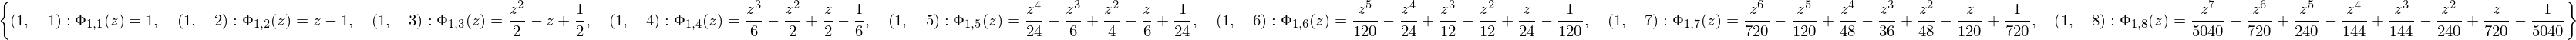

In [11]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

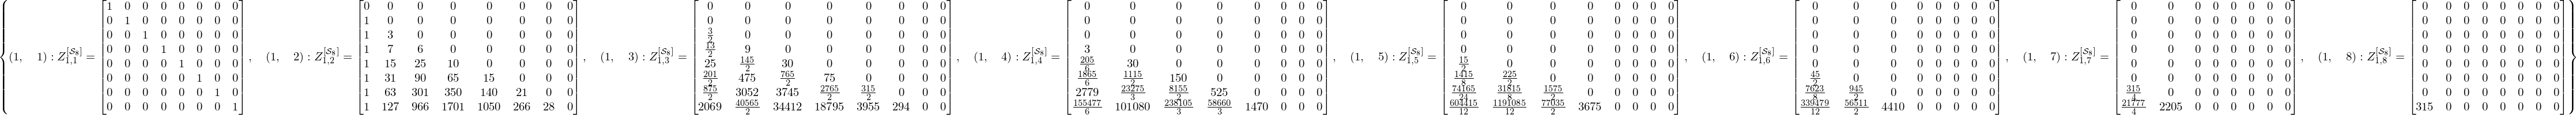

In [12]:
cmatrices = component_matrices(S2, Phi_polynomials)
cmatrices

## `power` function

In [13]:
f_power, g_power, G_power = functions_catalog.power(eigendata, Phi_polynomials)

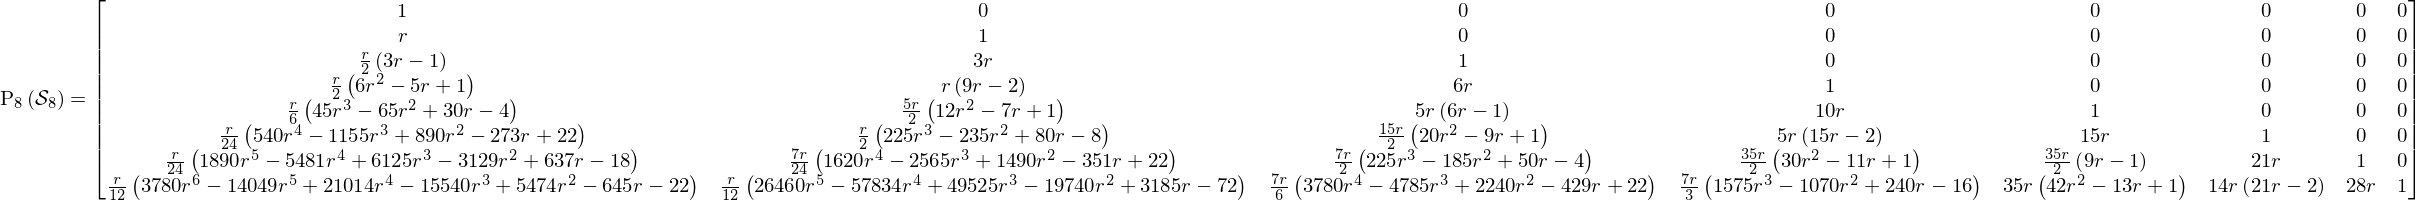

In [16]:
S2_power = G_power(S2)
S2_power

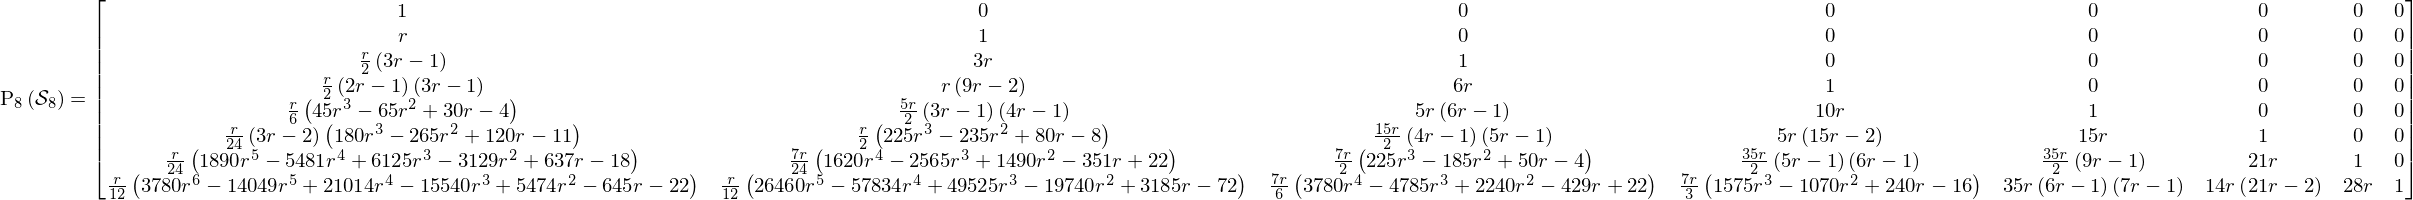

In [17]:
define(S2_power.lhs, S2_power.rhs.applyfunc(factor)) # factored

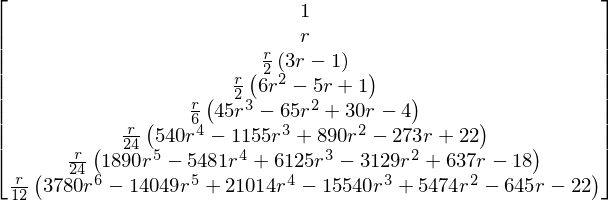

In [18]:
S2_power.rhs[:,0]

In [19]:
assert (S2.rhs**r).applyfunc(simplify) == S2_power.rhs

In [20]:
inspect(S2_power.rhs)

nature(is_ordinary=False, is_exponential=True)

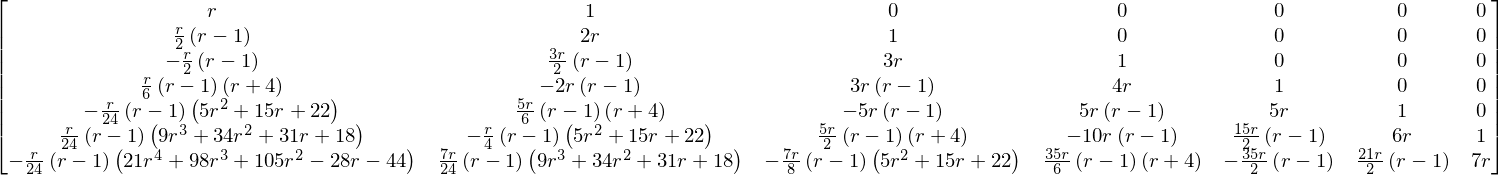

In [21]:
production_matrix(S2_power.rhs).applyfunc(factor)

## `inverse` function

In [22]:
f_inverse, g_inverse, G_inverse = functions_catalog.inverse(eigendata, Phi_polynomials)

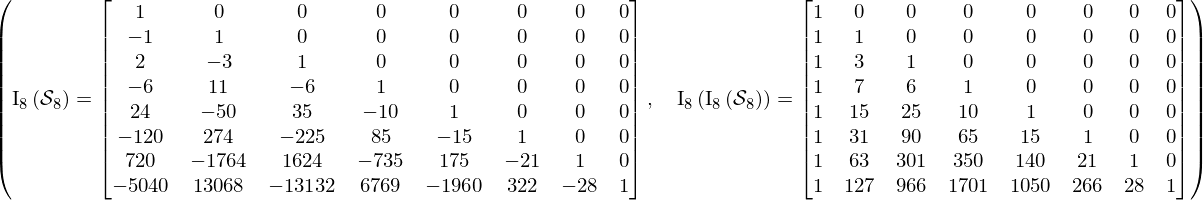

In [23]:
S2_inverse = G_inverse(S2)
S2_inverse, G_inverse(S2_inverse)

In [24]:
inspect(S2_inverse.rhs)

nature(is_ordinary=False, is_exponential=True)

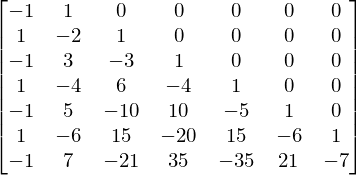

In [25]:
production_matrix(S2_inverse.rhs)

In [26]:
assert S2_inverse.rhs*S2.rhs == Matrix(m, m, identity_matrix())
assert S2_inverse.rhs == S2_power.rhs.subs({r:-1})

## `sqrt` function

In [27]:
f_sqrt, g_sqrt, G_sqrt = functions_catalog.square_root(eigendata, Phi_polynomials)

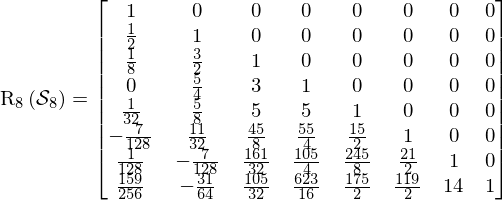

In [28]:
S2_sqrt = G_sqrt(S2)
S2_sqrt

In [29]:
inspect(S2_sqrt.rhs)

nature(is_ordinary=False, is_exponential=True)

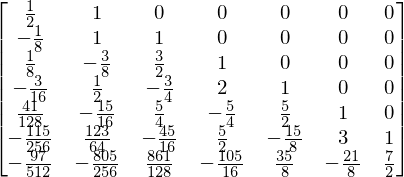

In [30]:
production_matrix(S2_sqrt.rhs)

In [40]:
inspect(S2_sqrt.rhs)

nature(is_ordinary=False, is_exponential=True)

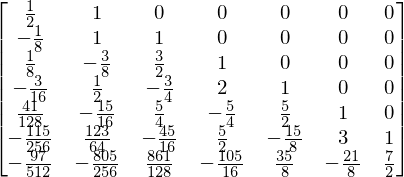

In [33]:
production_matrix(S2_sqrt.rhs, exp=False)

In [34]:
assert S2_sqrt.rhs == S2.rhs**(S(1)/2)
assert S2_sqrt.rhs == S2_power.rhs.subs({r:S(1)/2})

## `expt` function

In [35]:
f_exp, g_exp, G_exp = functions_catalog.exp(eigendata, Phi_polynomials)

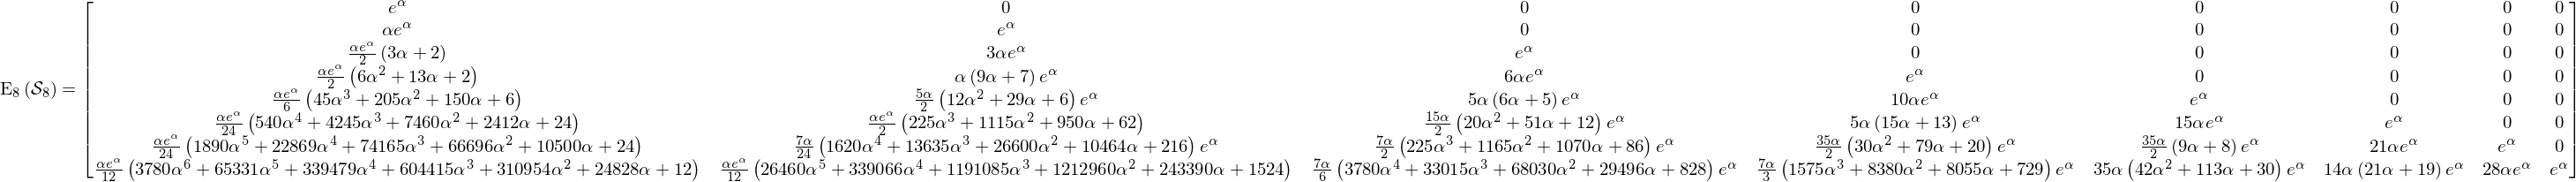

In [36]:
S2_exp = G_exp(S2)
S2_exp

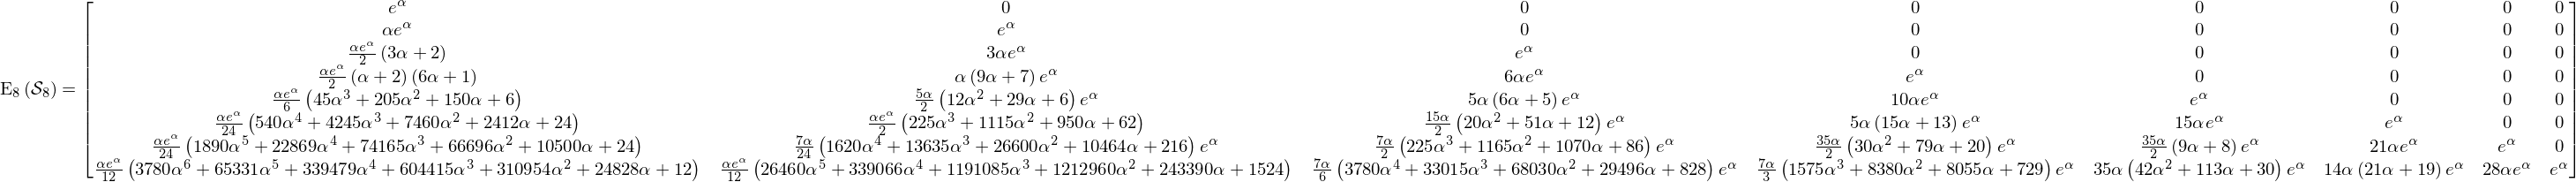

In [37]:
define(S2_exp.lhs, S2_exp.rhs.applyfunc(factor))

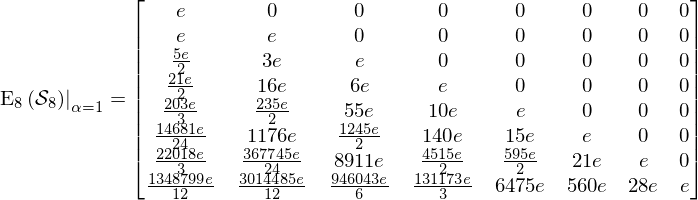

In [38]:
S2_exp1 = define(let=Subs(S2_exp.lhs, alpha, 1), be=S2_exp.rhs.subs({alpha:1}))
S2_exp1

In [39]:
inspect(S2_exp.rhs)

nature(is_ordinary=False, is_exponential=False)

In [40]:
inspect(S2_exp1.rhs)

nature(is_ordinary=False, is_exponential=False)

## `log` function

In [41]:
f_log, g_log, G_log = functions_catalog.log(eigendata, Phi_polynomials)

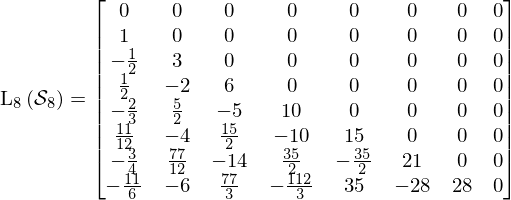

In [42]:
S2_log = G_log(S2)
S2_log

In [43]:
inspect(S2_log.rhs[1:,:-1])

nature(is_ordinary=False, is_exponential=True)

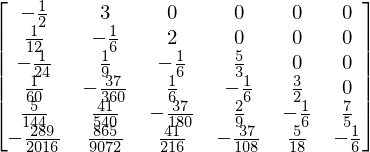

In [44]:
production_matrix(S2_log.rhs[1:,:-1])

## `sin` function

In [45]:
f_sin, g_sin, G_sin = functions_catalog.sin(eigendata, Phi_polynomials)

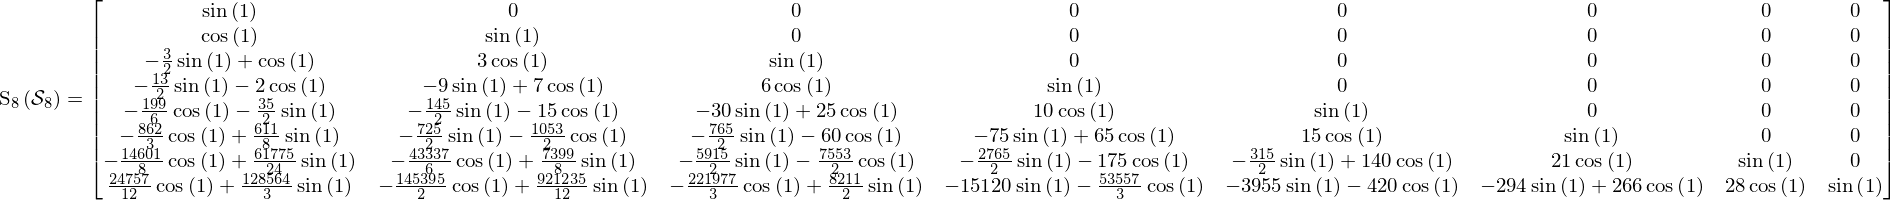

In [46]:
S2_sin = G_sin(S2)    
S2_sin

## `cos` function

In [47]:
f_cos, g_cos, G_cos = functions_catalog.cos(eigendata, Phi_polynomials)

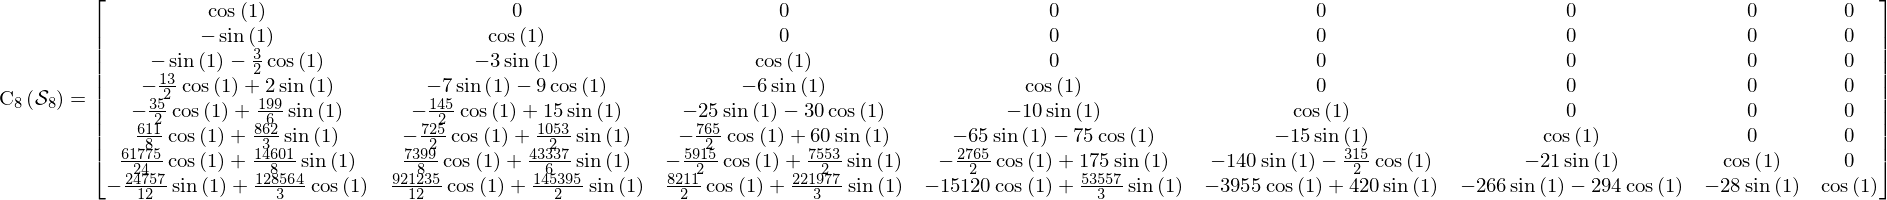

In [48]:
S2_cos = G_cos(S2)    
S2_cos

In [49]:
assert (S2_sin.rhs**2 + S2_cos.rhs**2).applyfunc(trigsimp) == Matrix(m, m, identity_matrix())

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.